In [12]:
import pandas as pd
import numpy as np0

df = pd.read_csv("emissoes_carbono.csv")

def calcular_estatisticas_emissoes(filepath):
    try:
        df = pd.read_csv(filepath, encoding='utf-8')
    except FileNotFoundError:
        print(f"Erro: Arquivo não encontrado em {filepath}")
        return None, 0
    except Exception as e:
        print(f"Erro ao ler o arquivo CSV: {e}")
        return None, 0

    coluna_emissao = "emissão estimada de CO2"
    coluna_metrica = "métrica"

    if coluna_emissao not in df.columns:
        print(f"Erro: Coluna '{coluna_emissao}' não encontrada no CSV.")
        return None, 0
    if coluna_metrica not in df.columns:
        print(f"Erro: Coluna '{coluna_metrica}' não encontrada no CSV.")
        return None, 0

    # Tentar converter a coluna de emissão para numérico, tratando erros
    # Os valores já estão pré-processados, mas a verificação é útil

    # Assegurar que a coluna é tratada como string antes de substituir vírgulas por pontos
    df[coluna_emissao] = df[coluna_emissao].astype(str).str.replace(",", ".", regex=False)
    numeric_series = pd.to_numeric(df[coluna_emissao], errors='coerce')

    erros_conversao = numeric_series.isna().sum()
    df[coluna_emissao] = numeric_series.fillna(0)


    resultados_estatisticos = {}

    metricas_unicas = df[coluna_metrica].unique()
    if len(metricas_unicas) == 0:
        print("Nenhuma métrica encontrada para agrupar os dados.")
        return None, erros_conversao

    for metrica in metricas_unicas:
        df_filtrado = df[df[coluna_metrica] == metrica]
        if df_filtrado.empty:
            print(f"Nenhum dado encontrado para a métrica: {metrica}")
            continue

        dados_emissao_filtrados = df_filtrado[coluna_emissao]

        if dados_emissao_filtrados.empty:
            estatisticas = {
                "média": "N/A",
                "mediana": "N/A",
                "desvio_padrão": "N/A",
                "variância": "N/A",
                "amplitude": "N/A",
                "contagem_valores": 0
            }
        else:
            media = dados_emissao_filtrados.mean()
            mediana = dados_emissao_filtrados.median()
            desvio_padrao = dados_emissao_filtrados.std()
            variancia = dados_emissao_filtrados.var()
            # Calcular amplitude apenas se houver dados válidos para evitar erro com NaN
            amplitude = (dados_emissao_filtrados.max() - dados_emissao_filtrados.min()) if dados_emissao_filtrados.notna().any() and len(dados_emissao_filtrados) > 0 else 0

            estatisticas = {
                "média": f"{media:.2f}" if pd.notna(media) else "N/A",
                "mediana": f"{mediana:.2f}" if pd.notna(mediana) else "N/A",
                "desvio_padrão": f"{desvio_padrao:.2f}" if pd.notna(desvio_padrao) else "N/A",
                "variância": f"{variancia:.2f}" if pd.notna(variancia) else "N/A",
                "amplitude": f"{amplitude:.2f}" if pd.notna(amplitude) else "N/A",
                "contagem_valores": len(dados_emissao_filtrados)
            }

        resultados_estatisticos[metrica] = estatisticas

    return resultados_estatisticos, erros_conversao

if __name__ == "__main__":
    filepath = "emissoes_carbono.csv"
    resultados, erros = calcular_estatisticas_emissoes(filepath)

    if resultados:
        print("\n--- Resultados Estatísticos ---")
        for metrica, stats in resultados.items():
            print(f"\nEstatísticas para a métrica: '{metrica}'")
            print(f"  Número de observações: {stats['contagem_valores']}")
            print(f"  Média: {stats['média']}")
            print(f"  Mediana: {stats['mediana']}")
            print(f"  Desvio Padrão: {stats['desvio_padrão']}")
            print(f"  Variância: {stats['variância']}")
            print(f"  Amplitude (Máx - Mín): {stats['amplitude']}")




--- Resultados Estatísticos ---

Estatísticas para a métrica: 'Emissions (thousand metric tons of carbon dioxide)'
  Número de observações: 1722
  Média: 376398.09
  Mediana: 6559.00
  Desvio Padrão: 2316519.30
  Variância: 5366261658698.70
  Amplitude (Máx - Mín): 33147028.00

Estatísticas para a métrica: 'Emissions per capita (Kilograms of carbon dioxide)'
  Número de observações: 1722
  Média: 4.44
  Mediana: 2.50
  Desvio Padrão: 5.52
  Variância: 30.45
  Amplitude (Máx - Mín): 45.40


# No DataFrame emissões de carbono
## Coluna: emissão estimada de CO2
### Média:
O quanto o país médio polui em 1 ano
### Mediana:
- Observar junto à média
    - Se ela for maior que a média, pode-se concluir que muitos países contribuem expressivamente para as emissões, consequentemente, deve-se haver países que contribuem pouquíssimo para ela
    - Se ela for menor que a média, pode-se concluir que poucos países contribuem expressivamente para as emissões, demonstrando altos focos poluentes
### Desvio padrão
- Mostra o quanto os países variam em média em suas estatísticas de poluição
### Variãncia
- A média de como os países se distanciam da média
    - Uma alta variância significa que ou os países poluem muito, ou poluem pouco
    - Uma baixa variância significa que a emissão de CO2 é bem distribuída no mundo
### Amplitude
- Nos mostra como os países estão distrbuídos em relação a como poluem
    - Uma amplitude menor que a média mostra que os países poluem na mesma proporção
    - Uma amplitude maior significa que poucos países poluem muito


In [13]:
def gerar_relatorio_gdp_estatisticas(filepath):
    try:
        df = pd.read_csv(filepath, encoding='utf-8')
    except FileNotFoundError:
        print(f"Erro: Arquivo não encontrado em {filepath}")
        return
    except Exception as e:
        print(f"Erro ao ler o arquivo CSV: {e}")
        return

    colunas_analise = ['Agricultura', 'Indústria', 'Serviços']

    # Verificar se as colunas existem
    for coluna in colunas_analise:
        if coluna not in df.columns:
            print(f"Erro: Coluna '{coluna}' não encontrada no CSV.")
            return

    print("--- Resultados Estatísticos ---")

    for coluna in colunas_analise:
        # Limpeza e conversão para numérico
        # Remove '%', substitui ',' por '.', depois converte para numérico
        df[coluna] = df[coluna].astype(str).str.rstrip('%').str.replace(',', '.', regex=False)
        df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

        # Calcular estatísticas
        media = df[coluna].mean()
        mediana = df[coluna].median()
        desvio_padrao = df[coluna].std()
        variancia = df[coluna].var()

        if df[coluna].notna().any():
            amplitude = df[coluna].max() - df[coluna].min()
        else:
            amplitude = float('nan')

        print(f"\nEstatísticas para a coluna: '{coluna}'")
        print(f"  Média: {media:.2f}" if pd.notna(media) else "  Média: N/A")
        print(f"  Mediana: {mediana:.2f}" if pd.notna(mediana) else "  Mediana: N/A")
        print(f"  Desvio Padrão: {desvio_padrao:.2f}" if pd.notna(desvio_padrao) else "  Desvio Padrão: N/A")
        print(f"  Variância: {variancia:.2f}" if pd.notna(variancia) else "  Variância: N/A")
        print(f"  Amplitude (Máx - Mín): {amplitude:.2f}" if pd.notna(amplitude) else "  Amplitude (Máx - Mín): N/A")

if __name__ == "__main__":
    arquivo_csv_gdp = "gdp_composicao_setores.csv"
    gerar_relatorio_gdp_estatisticas(arquivo_csv_gdp)



--- Resultados Estatísticos ---

Estatísticas para a coluna: 'Agricultura'
  Média: 10.97
  Mediana: 6.55
  Desvio Padrão: 12.09
  Variância: 146.21
  Amplitude (Máx - Mín): 60.70

Estatísticas para a coluna: 'Indústria'
  Média: 25.37
  Mediana: 24.25
  Desvio Padrão: 12.63
  Variância: 159.43
  Amplitude (Máx - Mín): 61.40

Estatísticas para a coluna: 'Serviços'
  Média: 61.83
  Mediana: 61.15
  Desvio Padrão: 16.36
  Variância: 267.75
  Amplitude (Máx - Mín): 100.00


## No dataframe de composição do PIB dos países
### A média das colunas
- representa o quanto, no mundo, esses setores contribuem para o PIB
### A mediana das colunas
 - nos mostra como estão distribuídos esses focos de setores:
    - Uma mediana menor que a média significa que poucos países detém muita força em certos setores
    - Uma mediana maior que a média significa que muitos países investem nesse setor, como podemos ver nos serviços
### O desvio padrão das colunas
 - Nos mostra o quanto os países variam no investimento em tal setor
    - Um desvio padrão alto significa que há mais países com contribuições desiguais
    - Um desvio padrão baixo significa que os dados são mais homogêmeos
### A variância das colunas
 - Nos mostra como, em média, os países estão próximos à média
    - Um valor mais alto na variância significa que os países tendem mais a possuírem investimentos fora da média
    - Um valor mais baixo significa que o setor possui, em média, presença sustentável nos países
        - Se espera que setores mais estáveis, como a saúde, tenham variâncias menores
### A amplitude das colunas
 - Nos mostra como o país que mais investe num setor se compara ao que menos investe
    - Uma amplitude alta significa que há países que há disparidade entre investimentos no setor entre países
    - Uma amplitude baixa significa que o setor é mais comum de possuir investimentos, espera-se amplitudes baixas em setores como transporte público, saneamento básico, fornecimento de energia, etc


### Crescimento da média de CO2 emitido por setor


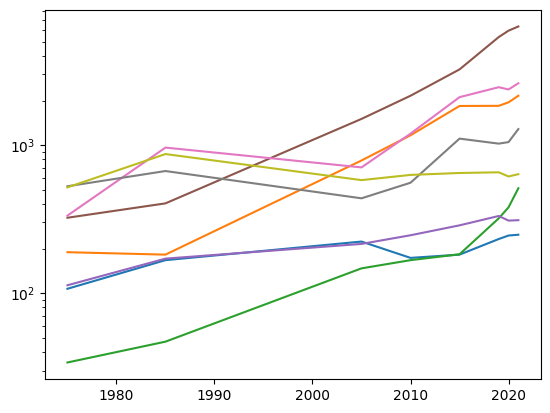

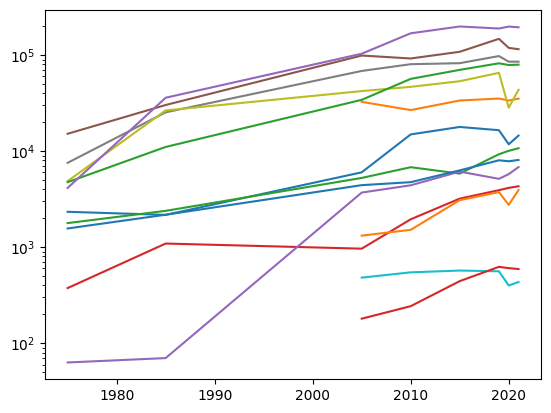

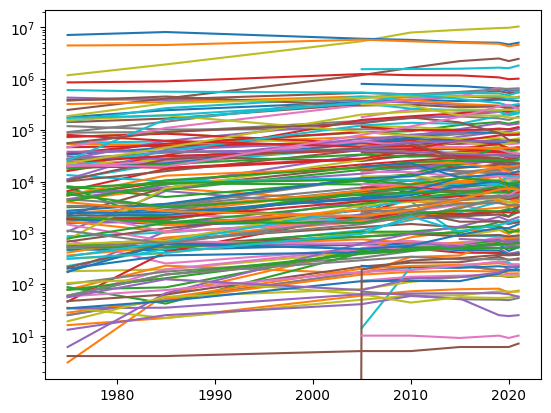

Crescimento médio das emissões de carbono dos países com PIB com setor agrícola prediminante: 2.38%
Crescimento médio das emissões de carbono dos países com PIB com setor industrial prediminante: 51.47%
Crescimento médio das emissões de carbono dos países com PIB com setor serviços prediminante: 1076.49%


In [14]:
from logging import log
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dfRelacaoSetores = pd.read_csv("gdp_composicao_setores.csv")
### Padronizando o nome do total geral com a outra tabela manualmente (não será mais utilizado)
# dfRelacaoSetores.loc[68, 'País'] = 'Falkland Islands (Malvinas)'
# dfRelacaoSetores.loc[227, 'País'] = 'Total, all countries or areas'

# Construindo filtros que serão usados mais pra fremte
buffer = dfRelacaoSetores[dfRelacaoSetores.Agricultura > dfRelacaoSetores.Serviços]
Relacao_Agro_Predominante = buffer[buffer.Agricultura > buffer.Indústria]

buffer = dfRelacaoSetores[dfRelacaoSetores.Indústria > dfRelacaoSetores.Serviços]
Relacao_Indu_Predominante = buffer[buffer.Indústria > buffer.Agricultura]

buffer = dfRelacaoSetores[dfRelacaoSetores.Serviços > dfRelacaoSetores.Indústria]
Relacao_Serv_Predominante = buffer[buffer.Serviços > buffer.Agricultura]

# Filtrando DataFrame com todos os dados de emissões totais por data (excluindo emissões per capita)
dfCarbonoTotal = pd.read_csv("emissoes_carbono.csv")
Filtered_dfCarbonoTotal = dfCarbonoTotal[dfCarbonoTotal.métrica == 'Emissions (thousand metric tons of carbon dioxide)']



# Filtrando o DataFrame para a primeira métrica - países com setor agrícola predominante
filter_list_PAISES = Relacao_Agro_Predominante['País'].tolist()
Agro_Filtered_dfCarbonoTotal = Filtered_dfCarbonoTotal[Filtered_dfCarbonoTotal['país'].isin(filter_list_PAISES)]

# Constrói gráfico com todos os países com o setor predominante X
contador = 0
total_inicial = 0
total_final = 0
for PAIS in filter_list_PAISES:
    PAIS_Agro_Filtered = Agro_Filtered_dfCarbonoTotal[Agro_Filtered_dfCarbonoTotal.país == PAIS]
    # Construindo lista com os anos presentes no DataFrame filtrado
    filter_list_ANOS = PAIS_Agro_Filtered['ano'].tolist()
    filter_list_ANOS = list(set(filter_list_ANOS))
    filter_list_ANOS = np.sort(filter_list_ANOS)
    yPoints = PAIS_Agro_Filtered['emissão estimada de CO2'].tolist()
    xPoints = filter_list_ANOS
    plt.plot(xPoints, yPoints)
    contador = contador +1
    if len(yPoints) > 0:
      total_inicial = total_inicial + yPoints[0]
      totl_final = total_final + yPoints[-1]
crescimento_setor_agro = (total_inicial -total_final)/contador
plt.yscale("log")
plt.show()

# Filtrando o DataFrame para a primeira métrica - países com setor indústria predominante
filter_list_PAISES = Relacao_Indu_Predominante['País'].tolist()
Indu_Filtered_dfCarbonoTotal = Filtered_dfCarbonoTotal[Filtered_dfCarbonoTotal['país'].isin(filter_list_PAISES)]

# Constrói gráfico com todos os países com o setor predominante X
contador = 0
total_inicial = 0
total_final = 0
for PAIS in filter_list_PAISES:
    PAIS_Indu_Filtered = Indu_Filtered_dfCarbonoTotal[Indu_Filtered_dfCarbonoTotal.país == PAIS]
    # Construindo lista com os anos presentes no DataFrame filtrado
    filter_list_ANOS = PAIS_Indu_Filtered['ano'].tolist()
    filter_list_ANOS = list(set(filter_list_ANOS))
    filter_list_ANOS = np.sort(filter_list_ANOS)
    # Construindo gráfico
    xPoints = filter_list_ANOS
    yPoints = PAIS_Indu_Filtered['emissão estimada de CO2'].tolist()
    plt.plot(xPoints, yPoints)
    contador = contador +1
    if len(yPoints) > 0:
      total_inicial = total_inicial + yPoints[0]
      totl_final = total_final + yPoints[-1]
crescimento_setor_indu = (total_inicial -total_final)/contador
plt.yscale("log")
plt.show()


# Filtrando o DataFrame para a primeira métrica - países com setor serviço predominante
filter_list_PAISES = Relacao_Serv_Predominante['País'].tolist()
Serv_Filtered_dfCarbonoTotal = Filtered_dfCarbonoTotal[Filtered_dfCarbonoTotal['país'].isin(filter_list_PAISES)]

# Constrói gráfico com todos os países com o setor predominante X
contador = 0
total_inicial = 0
total_final = 0
for PAIS in filter_list_PAISES:
    PAIS_Serv_Filtered = Serv_Filtered_dfCarbonoTotal[Serv_Filtered_dfCarbonoTotal.país == PAIS]
    # Construindo lista com os anos presentes no DataFrame filtrado
    filter_list_ANOS = PAIS_Serv_Filtered['ano'].tolist()
    filter_list_ANOS = list(set(filter_list_ANOS))
    filter_list_ANOS = np.sort(filter_list_ANOS)
    # Construindo gráfico
    xPoints = filter_list_ANOS
    yPoints = PAIS_Serv_Filtered['emissão estimada de CO2'].tolist()
    plt.plot(xPoints, yPoints)
    contador = contador +1
    if len(yPoints) > 0:
      total_inicial = total_inicial + yPoints[0]
      totl_final = total_final + yPoints[-1]
crescimento_setor_serv = (total_inicial -total_final)/contador
plt.yscale("log")
plt.show()

crescimento_setor_agro = int(crescimento_setor_agro)/100
crescimento_setor_indu = int(crescimento_setor_indu)/100
crescimento_setor_serv = int(crescimento_setor_serv)/100

print("Crescimento médio das emissões de carbono dos países com PIB com setor agrícola prediminante: " + str(crescimento_setor_agro) + "%")
print("Crescimento médio das emissões de carbono dos países com PIB com setor industrial prediminante: " + str(crescimento_setor_indu) + "%")
print("Crescimento médio das emissões de carbono dos países com PIB com setor serviços prediminante: " + str(crescimento_setor_serv) + "%")

## Diferença de 49,09% no crescimento de emissões
É possível verificar com os dados que, países com maior foco industrial tiveram um aumento mais de 20 vezes maior em suas emissões entre o início e final da pesquisa

### Setor Serviços predominante atrapalha a análise
O setor de serviços, apesar de realmente ser o foco de alguns países, usualmente gera um percentual maior do PIB de um país justamente por ser utilizado diretamente por sua população, visto isso, veremos uma análise comparando apenas os setores agrícola e industrial:

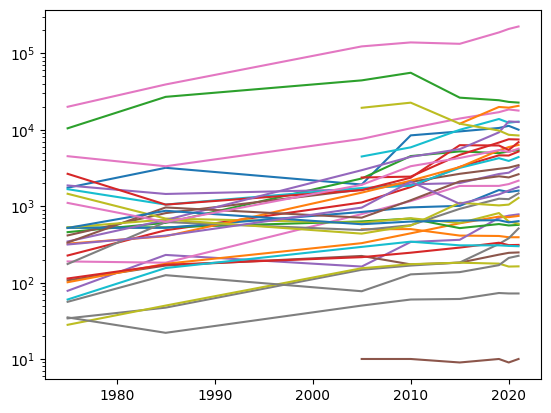

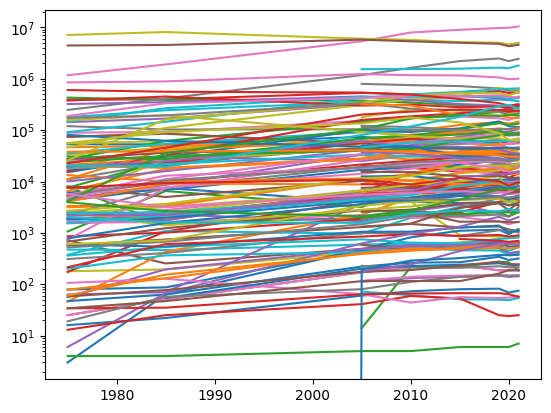

Crescimento médio das emissões de carbono dos países com PIB com setor agrícola prediminante: 22.97%
Crescimento médio das emissões de carbono dos países com PIB com setor industrial prediminante: 1187.09%


In [15]:
from logging import log
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dfRelacaoSetores = pd.read_csv("gdp_composicao_setores.csv")
### Padronizando o nome do total geral com a outra tabela manualmente (não será mais utilizado)
# dfRelacaoSetores.loc[68, 'País'] = 'Falkland Islands (Malvinas)'
# dfRelacaoSetores.loc[227, 'País'] = 'Total, all countries or areas'

# Construindo filtros que serão usados mais pra fremte
Relacao_Agro_Predominante = dfRelacaoSetores[dfRelacaoSetores.Agricultura > dfRelacaoSetores.Indústria]
Relacao_Indu_Predominante = dfRelacaoSetores[dfRelacaoSetores.Indústria > dfRelacaoSetores.Agricultura]

# Filtrando DataFrame com todos os dados de emissões totais por data (excluindo emissões per capita)
dfCarbonoTotal = pd.read_csv("emissoes_carbono.csv")
Filtered_dfCarbonoTotal = dfCarbonoTotal[dfCarbonoTotal.métrica == 'Emissions (thousand metric tons of carbon dioxide)']

# Filtrando o DataFrame para a primeira métrica - países com setor agrícola predominante
filter_list_PAISES = Relacao_Agro_Predominante['País'].tolist()
Agro_Filtered_dfCarbonoTotal = Filtered_dfCarbonoTotal[Filtered_dfCarbonoTotal['país'].isin(filter_list_PAISES)]

# Constrói gráfico com todos os países com o setor predominante X
contador = 0
total_inicial = 0
total_final = 0
for PAIS in filter_list_PAISES:
    PAIS_Agro_Filtered = Agro_Filtered_dfCarbonoTotal[Agro_Filtered_dfCarbonoTotal.país == PAIS]
    # Construindo lista com os anos presentes no DataFrame filtrado
    filter_list_ANOS = PAIS_Agro_Filtered['ano'].tolist()
    filter_list_ANOS = list(set(filter_list_ANOS))
    filter_list_ANOS = np.sort(filter_list_ANOS)
    yPoints = PAIS_Agro_Filtered['emissão estimada de CO2'].tolist()
    xPoints = filter_list_ANOS
    plt.plot(xPoints, yPoints)
    contador = contador +1
    if len(yPoints) > 0:
      total_inicial = total_inicial + yPoints[0]
      totl_final = total_final + yPoints[-1]
crescimento_setor_agro = (total_inicial -total_final)/contador
plt.yscale("log")
plt.show()

# Filtrando o DataFrame para a primeira métrica - países com setor indústria predominante
filter_list_PAISES = Relacao_Indu_Predominante['País'].tolist()
Indu_Filtered_dfCarbonoTotal = Filtered_dfCarbonoTotal[Filtered_dfCarbonoTotal['país'].isin(filter_list_PAISES)]

# Constrói gráfico com todos os países com o setor predominante X
contador = 0
total_inicial = 0
total_final = 0
for PAIS in filter_list_PAISES:
    PAIS_Indu_Filtered = Indu_Filtered_dfCarbonoTotal[Indu_Filtered_dfCarbonoTotal.país == PAIS]
    # Construindo lista com os anos presentes no DataFrame filtrado
    filter_list_ANOS = PAIS_Indu_Filtered['ano'].tolist()
    filter_list_ANOS = list(set(filter_list_ANOS))
    filter_list_ANOS = np.sort(filter_list_ANOS)
    # Construindo gráfico
    xPoints = filter_list_ANOS
    yPoints = PAIS_Indu_Filtered['emissão estimada de CO2'].tolist()
    plt.plot(xPoints, yPoints)
    contador = contador +1
    if len(yPoints) > 0:
      total_inicial = total_inicial + yPoints[0]
      totl_final = total_final + yPoints[-1]
crescimento_setor_indu = (total_inicial -total_final)/contador
plt.yscale("log")
plt.show()

crescimento_setor_agro = int(crescimento_setor_agro)/100
crescimento_setor_indu = int(crescimento_setor_indu)/100

print("Crescimento médio das emissões de carbono dos países com PIB com setor agrícola prediminante: " + str(crescimento_setor_agro) + "%")
print("Crescimento médio das emissões de carbono dos países com PIB com setor industrial prediminante: " + str(crescimento_setor_indu) + "%")


###Comparativo entre impacto no foco comercial dos países pelo mundo com suas emissões médias de carbono
Agora, é possível observar melhor como o foco comercial de cada país afeta suas emissões;
### Países com foco comercial industrial tiveram crescimento das emissões de carbono 51x maior que países com foco comercial agrícola
Os dados estão dentro do esperado, já que, desde a revolução industrial, esse setor vem despejando quantidades absurdas de CO2 na atmosfera e com o crescimento da população, essas emissões só aumentam


In [22]:
print("\n--- Análise de Correlação ---")

# Limpeza e conversão de colunas numéricas no dfRelacaoSetores
cols_to_convert = ['Agricultura', 'Indústria', 'Serviços']
for col in cols_to_convert:
    if col in dfRelacaoSetores.columns:
        dfRelacaoSetores[col] = dfRelacaoSetores[col].astype(str).str.rstrip('%').str.replace(',', '.', regex=False)
        dfRelacaoSetores[col] = pd.to_numeric(dfRelacaoSetores[col], errors='coerce')
    else:
        print(f"Aviso: Coluna '{col}' não encontrada em dfRelacaoSetores.")

# Limpeza e conversão da coluna numérica no dfCarbonoTotal
col_emissao = 'emissão estimada de CO2'
if col_emissao in dfCarbonoTotal.columns:
    dfCarbonoTotal[col_emissao] = dfCarbonoTotal[col_emissao].astype(str).str.replace(',', '.', regex=False)
    dfCarbonoTotal[col_emissao] = pd.to_numeric(dfCarbonoTotal[col_emissao], errors='coerce')
else:
    print(f"Aviso: Coluna '{col_emissao}' não encontrada em dfCarbonoTotal.")

# Precisamos de uma emissão agregada por país do dfCarbonoTotal para correlacionar
# Vamos calcular a emissão média por país ao longo do tempo, ou pegar o último ano disponível.
# Para simplicidade, vamos calcular a média das emissões totais ('Emissions (thousand metric tons of carbon dioxide)') por país.
df_emissao_total_agg = Filtered_dfCarbonoTotal.groupby('país')[col_emissao].mean().reset_index()
df_emissao_total_agg = df_emissao_total_agg.rename(columns={col_emissao: 'emissao_media_co2', 'país': 'País'})

# Unir os dataframes
# Usaremos um merge baseado na coluna 'País'.
# Pode haver incompatibilidades nos nomes dos países ou países faltantes em um dos dataframes.
# Um left merge (mantendo todos os países de dfRelacaoSetores) ou um inner merge (apenas países presentes em ambos)
# pode ser apropriado dependendo da análise desejada. Vamos usar inner merge para garantir dados completos.
df_merged = pd.merge(dfRelacaoSetores, df_emissao_total_agg, on='País', how='inner')

if df_merged.empty:
    print("Não foi possível juntar os dataframes. Verifique os nomes dos países e se há sobreposição.")
else:
    # Calcular a matriz de correlação para as colunas numéricas de interesse
    # As colunas de interesse são os setores do PIB e a emissão média de CO2
    correlation_columns = cols_to_convert + ['emissao_media_co2']

    # Certificar que as colunas existem no dataframe mesclado
    correlation_columns_present = [col for col in correlation_columns if col in df_merged.columns]

    if len(correlation_columns_present) < 2:
        print("Não há colunas numéricas suficientes no dataframe mesclado para calcular a correlação.")
    else:
        correlation_matrix = df_merged[correlation_columns_present].corr(numeric_only=True)

        print("\nMatriz de Correlação:")
        print(correlation_matrix)

        # Interpretação da Correlação com a 'emissao_media_co2'
        if 'emissao_media_co2' in correlation_matrix.columns:
            print("\nCorrelação dos Setores do PIB com a Emissão Média de CO2:")
            print(correlation_matrix['emissao_media_co2'].drop('emissao_media_co2'))

            # Breve interpretação
            print("\nInterpretação:")
            print("- Um coeficiente de correlação próximo a 1 indica uma forte correlação positiva (quando um aumenta, o outro tende a aumentar).")
            print("- Um coeficiente de correlação próximo a -1 indica uma forte correlação negativa (quando um aumenta, o outro tende a diminuir).")

            for sector in cols_to_convert:
                if sector in correlation_matrix.index:
                    corr_value = correlation_matrix.loc[sector, 'emissao_media_co2']
                    print(f"\nCorrelação entre '{sector}' e Emissão Média de CO2: {corr_value:.2f}")

                    if corr_value > 0:
                        direction = "positiva"
                        tendency = "a aumentar com o aumento do PIB do setor"
                    elif corr_value < 0:
                        direction = "negativa"
                        tendency = "a diminuir com o aumento do PIB do setor"
                    else:
                        direction = "praticamente nula"
                        tendency = "não ter uma relação linear clara com o PIB do setor"

                    print(f"  - Existe uma correlação {direction} entre o PIB do setor '{sector}' e a emissão média de CO2.")
                    print(f"  - Isso sugere que a emissão de CO2 tende {tendency}.")

        else:
             print("A coluna 'emissao_media_co2' não está presente na matriz de correlação. Verifique a junção e a limpeza dos dados.")



--- Análise de Correlação ---

Matriz de Correlação:
                   Agricultura  Indústria  Serviços  emissao_media_co2
Agricultura           1.000000  -0.274337 -0.502032          -0.108885
Indústria            -0.274337   1.000000 -0.451105           0.068123
Serviços             -0.502032  -0.451105  1.000000           0.038547
emissao_media_co2    -0.108885   0.068123  0.038547           1.000000

Correlação dos Setores do PIB com a Emissão Média de CO2:
Agricultura   -0.108885
Indústria      0.068123
Serviços       0.038547
Name: emissao_media_co2, dtype: float64

Interpretação:
- Um coeficiente de correlação próximo a 1 indica uma forte correlação positiva (quando um aumenta, o outro tende a aumentar).
- Um coeficiente de correlação próximo a -1 indica uma forte correlação negativa (quando um aumenta, o outro tende a diminuir).

Correlação entre 'Agricultura' e Emissão Média de CO2: -0.11
  - Existe uma correlação negativa entre o PIB do setor 'Agricultura' e a emissão média


Notas:
- A correlação não implica causalidade. Esta análise mostra apenas a relação linear entre as variáveis.
- Outros fatores e análises mais aprofundadas (como análise de regressão) seriam necessários para entender melhor a causalidade.
- Além disso, usar a emissão média de CO2 ao longo do tempo pode mascarar tendências anuais.
Uma análise por ano ou considerando tendências temporais seria mais completa.
